# End-to-end Machine Learning project

## Authors: Mustafa Khan, Ruhullah Rizvi, Christian Seguiza

**Original Dataset Source: Seth, Kritik. (2023). U.S. Airbnb Open Data. Kaggle. https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data**


**Modified Dataset: US AirBnB Open Data: https://raw.githubusercontent.com/Kh-Mustafa/Group6-FinalProject/985c8eab1b2d9512b8b6d023a5097b35709cd695/AB_US_2023.csv**

In [1]:
#initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

#for splitting
from sklearn.model_selection import train_test_split

#imports for the initial trial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

#imports for second trial
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
url = "https://raw.githubusercontent.com/Kh-Mustafa/Group6-FinalProject/985c8eab1b2d9512b8b6d023a5097b35709cd695/AB_US_2023.csv"
AirbnbData = pd.read_csv(url, sep=',')

C:\Users\musta\AppData\Local\Temp\ipykernel_13116\3692289996.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  AirbnbData = pd.read_csv(url, sep=',')


In [3]:
AirbnbData.all()

id                                 True
name                               True
host_id                            True
host_name                          True
neighbourhood_group                True
neighbourhood                      True
latitude                           True
longitude                          True
room_type                          True
price                             False
minimum_nights                     True
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count     True
availability_365                  False
number_of_reviews_ltm             False
city                               True
dtype: bool

In [4]:
AirbnbData

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.765550,-122.452130,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.760300,-122.421970,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232142,849230448624862502,Private Half Moon Bay Oasis By Pillar Point Be...,29395385,Khalid,NaN,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,0,NaN,NaN,1,365,0,San Mateo County
232143,850805127216414630,Home near SFO,440957696,Christina,NaN,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,0,NaN,NaN,1,364,0,San Mateo County
232144,851562104616413652,Modern New Private Studio in SFO,41574587,Vality,NaN,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,0,NaN,NaN,32,359,0,San Mateo County
232145,851792795339759410,Lux Bedroom with a Shared Bath near SFO,73133543,Stephannie,NaN,South San Francisco,37.644792,-122.454213,Private room,62,2,0,NaN,NaN,3,67,0,San Mateo County


In [6]:
#dropping unnessassary data

AirbnbData.drop(['id', 'last_review', 'neighbourhood_group', 'host_id', 'reviews_per_month', 'name', 'host_name'], axis=1, inplace=True)

In [10]:
#lets try something diff

# AirbnbData.drop(['neighbourhood', 'city'], axis=1, inplace=True)

In [8]:
#onehot encoding

AirbnbData_encoded = pd.get_dummies(AirbnbData, columns=['neighbourhood', 'city', 'room_type'], drop_first=False)

In [9]:
#find missing values

missing_values = AirbnbData_encoded.isnull().sum()
print(missing_values)

latitude                     0
longitude                    0
price                        0
minimum_nights               0
number_of_reviews            0
                            ..
city_Washington D.C.         0
room_type_Entire home/apt    0
room_type_Hotel room         0
room_type_Private room       0
room_type_Shared room        0
Length: 1451, dtype: int64


In [10]:
AirbnbData_encoded.head(15)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_28704,neighbourhood_28715,...,city_San Mateo County,city_Santa Clara County,city_Santa Cruz County,city_Seattle,city_Twin Cities MSA,city_Washington D.C.,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,37.77028,-122.43317,202,2,383,1,128,59,False,False,...,False,False,False,False,False,False,True,False,False,False
1,37.74474,-122.42089,235,30,111,1,365,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,37.76555,-122.45213,56,32,9,13,365,1,False,False,...,False,False,False,False,False,False,False,False,True,False
3,37.77564,-122.43642,575,9,28,2,365,0,False,False,...,False,False,False,False,False,False,True,False,False,False
4,37.76030,-122.42197,110,1,770,2,159,34,False,False,...,False,False,False,False,False,False,False,False,True,False
5,37.71750,-122.39698,95,1,19,2,365,1,False,False,...,False,False,False,False,False,False,False,False,True,False
6,37.78440,-122.47932,259,5,234,1,32,13,False,False,...,False,False,False,False,False,False,True,False,False,False
7,37.74766,-122.42041,100,30,80,1,331,1,False,False,...,False,False,False,False,False,False,False,False,True,False
8,37.79249,-122.41499,79,30,18,1,230,0,False,False,...,False,False,False,False,False,False,True,False,False,False
9,37.76901,-122.44701,65,32,7,13,365,1,False,False,...,False,False,False,False,False,False,False,False,True,False


# EDA Graphs

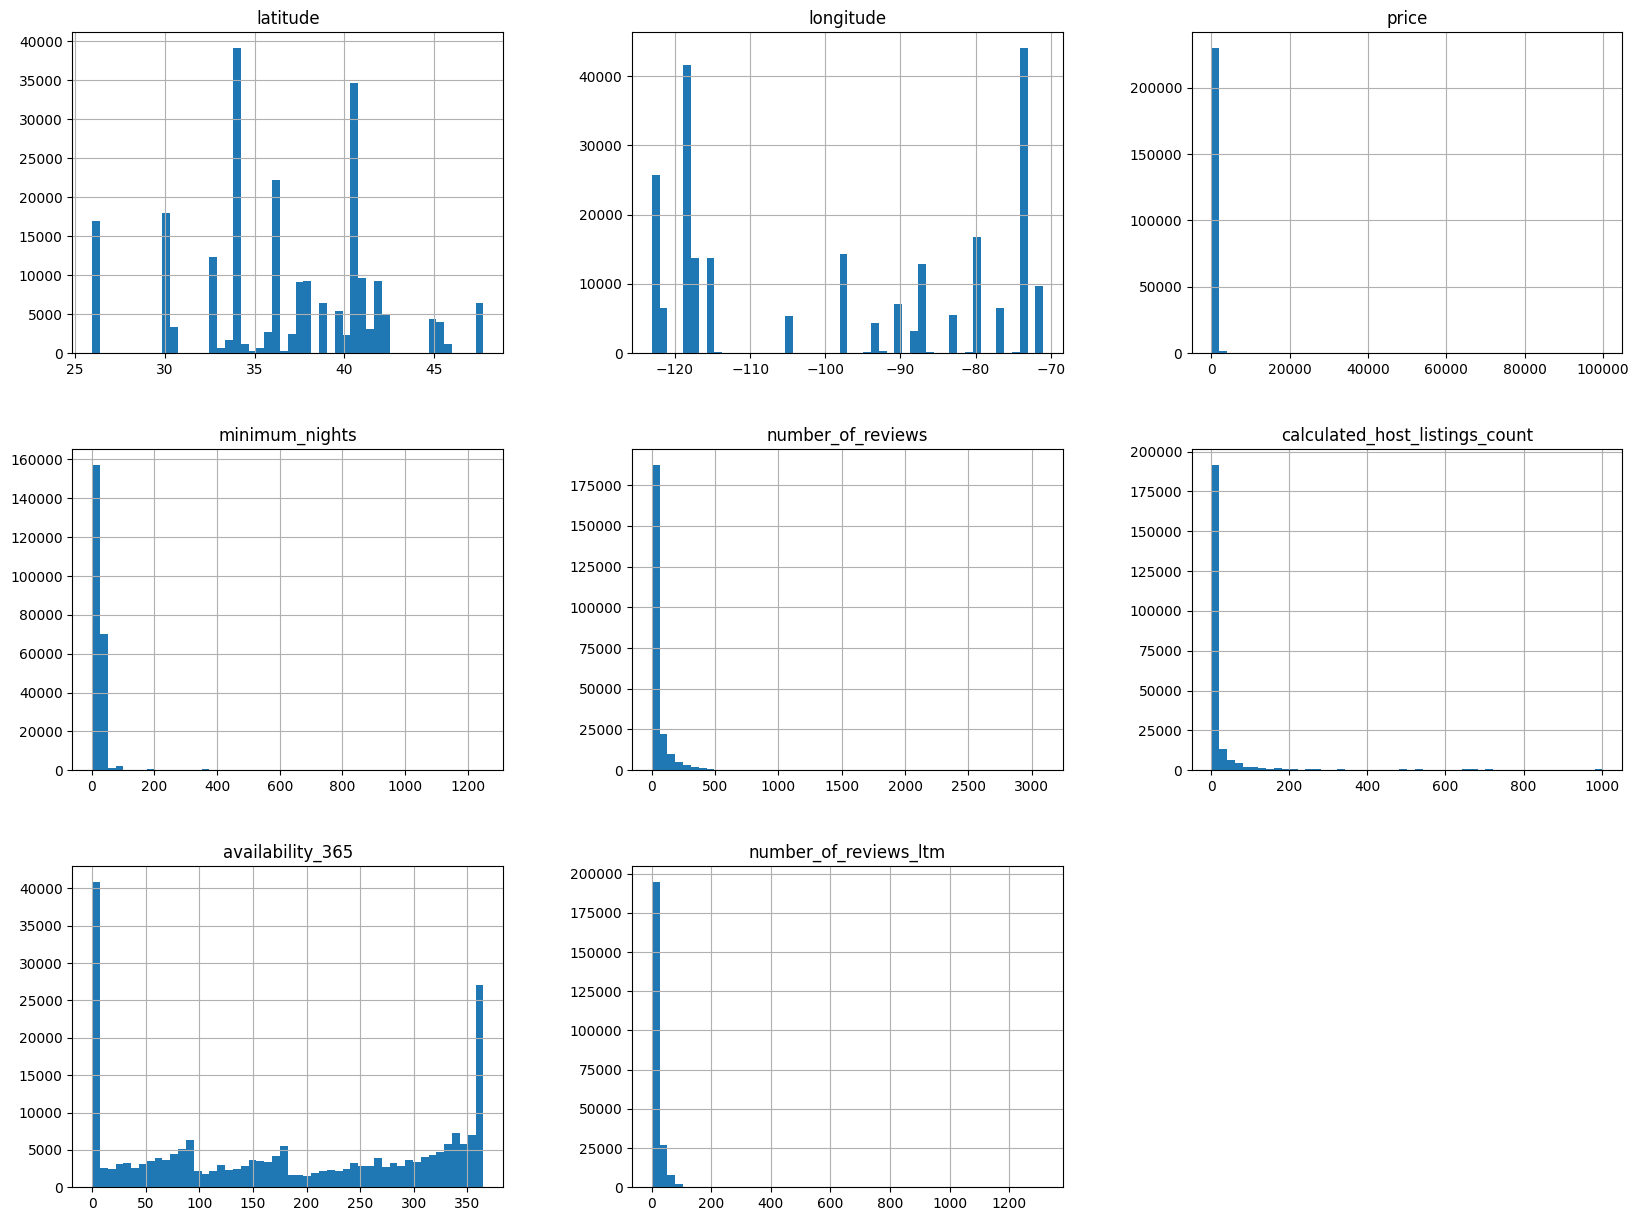

In [11]:
# Summary statistics for numerical columns
summary_statistics = AirbnbData.describe()

# Distributions of numerical features
import matplotlib.pyplot as plt
AirbnbData_encoded.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# Select the numeric columns for checking for correlation 
numeric_cols = AirbnbData.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

# look at how everything correlates to price
price_correlations = correlation_matrix["price"].sort_values(ascending=False)
print(price_correlations)

print("--------------------")

# look at how everything correlates to no of reviews
price_correlations = correlation_matrix["number_of_reviews"].sort_values(ascending=False)
print(price_correlations)

price                             1.000000
calculated_host_listings_count    0.018823
availability_365                  0.015663
minimum_nights                   -0.022933
longitude                        -0.023272
number_of_reviews_ltm            -0.035012
number_of_reviews                -0.035233
latitude                         -0.041702
Name: price, dtype: float64
--------------------
number_of_reviews                 1.000000
number_of_reviews_ltm             0.676836
latitude                          0.035587
availability_365                 -0.027564
price                            -0.035233
longitude                        -0.051300
calculated_host_listings_count   -0.107552
minimum_nights                   -0.126818
Name: number_of_reviews, dtype: float64


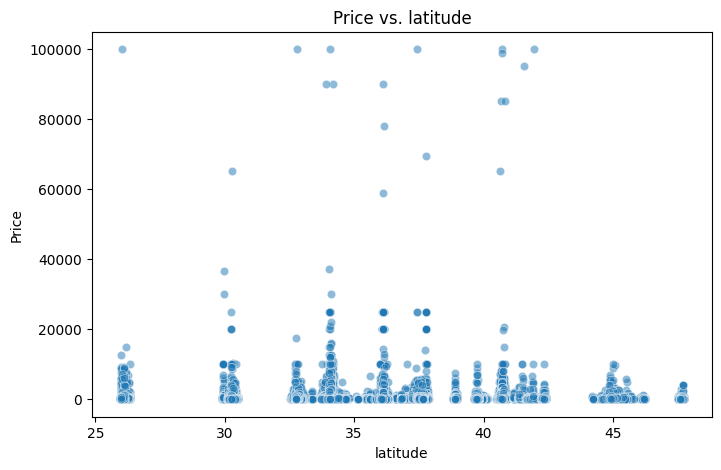

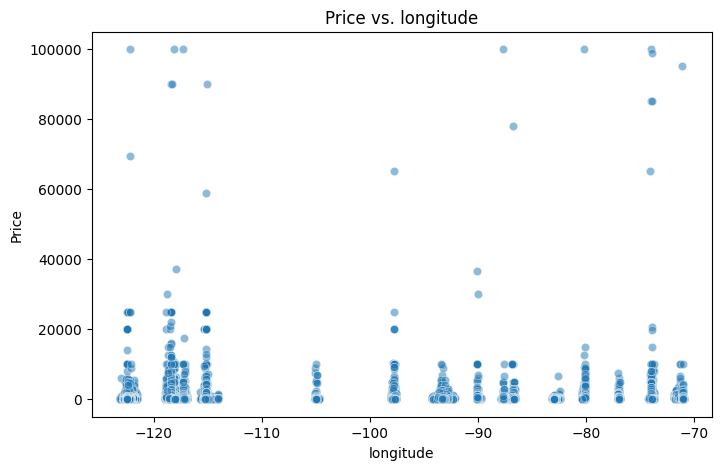

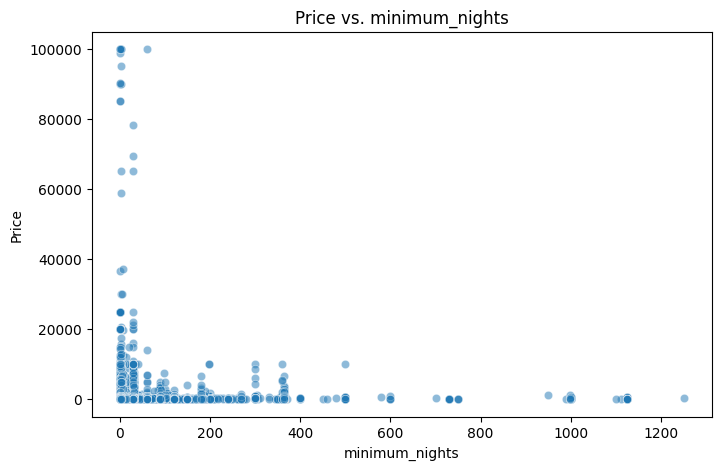

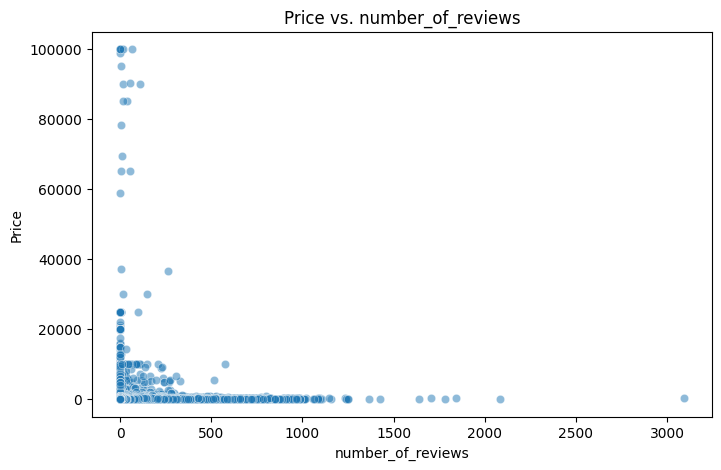

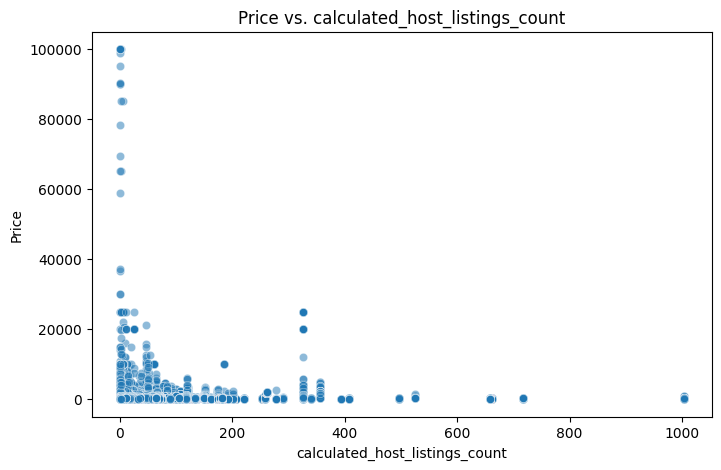

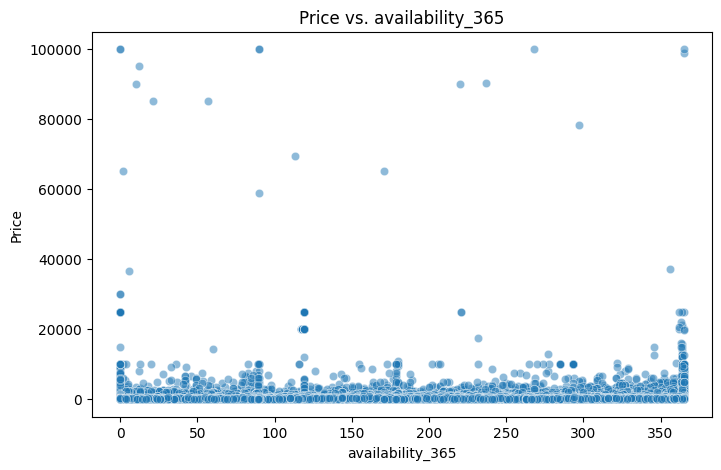

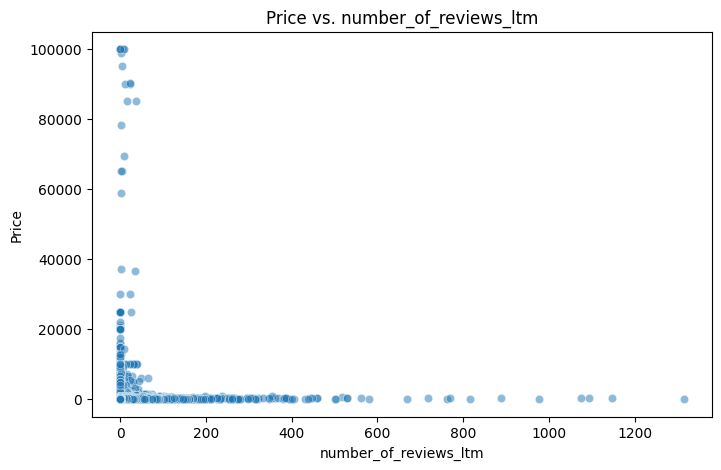

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns (excluding 'price' to avoid plotting it against itself)
numeric_cols = AirbnbData.select_dtypes(include=['int64', 'float64']).columns.drop('price')

# Plotting
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=AirbnbData, x=col, y='price', alpha=0.5)
    plt.title(f'Price vs. {col}')
    plt.ylabel('Price')
    plt.xlabel(col)
    plt.show()


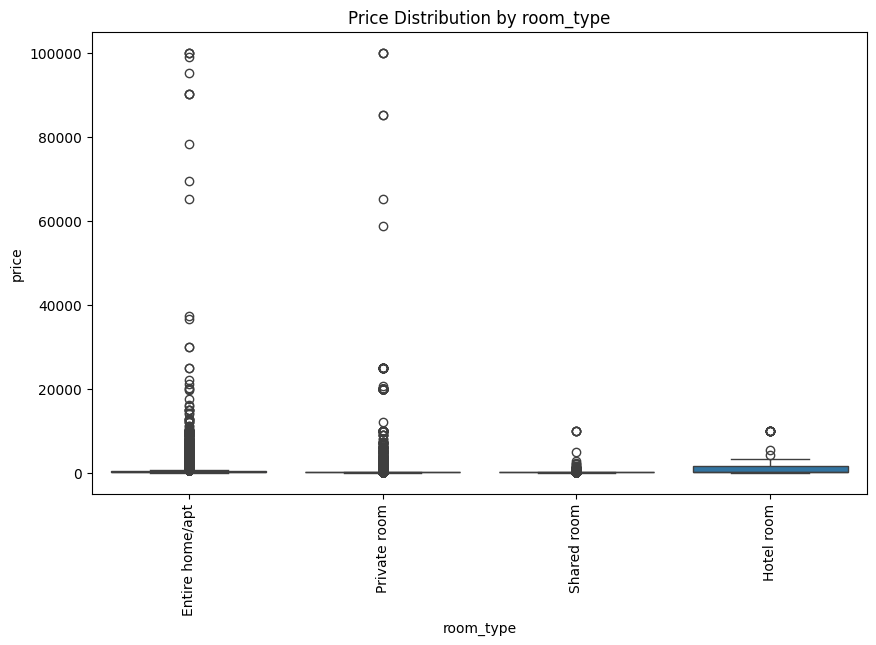

In [14]:
# 'room_type' is categorical
categorical_cols = ['room_type']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=AirbnbData, x=col, y='price')
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=90)  # Rotate labels to avoid overlap
    plt.show()


## Problem

the graphs above are not very good visualizations as the data is skewed(?)

## Solution

Take logarithm of price to get a better visualization

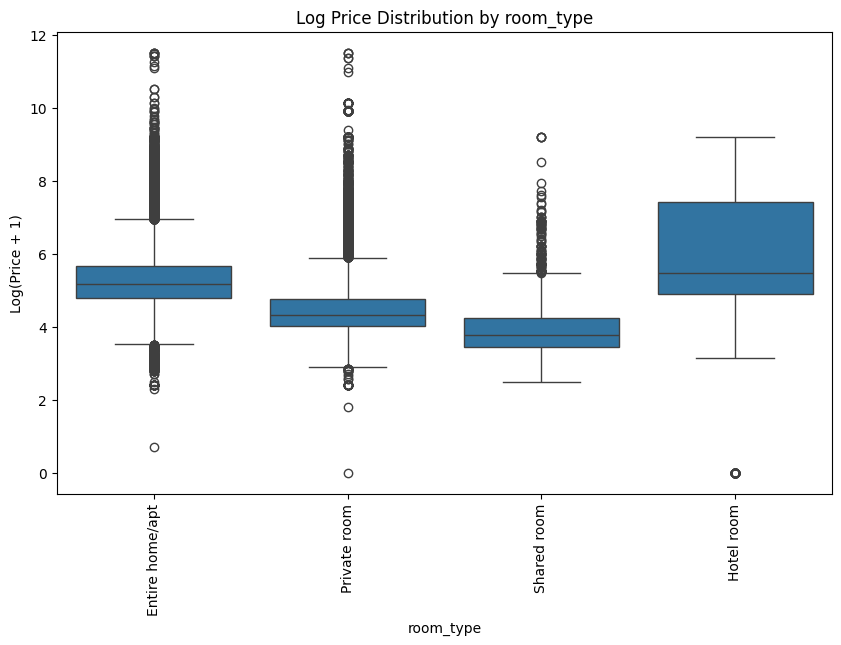

In [15]:
categorical_cols = ['room_type']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Apply log transformation to 'price' and plot
    sns.boxplot(data=AirbnbData, x=col, y=np.log1p(AirbnbData['price']))
    plt.title(f'Log Price Distribution by {col}')
    plt.ylabel('Log(Price + 1)')  # Update label to reflect the transformation
    plt.xticks(rotation=90)  # Rotate labels to avoid overlap
    plt.show()

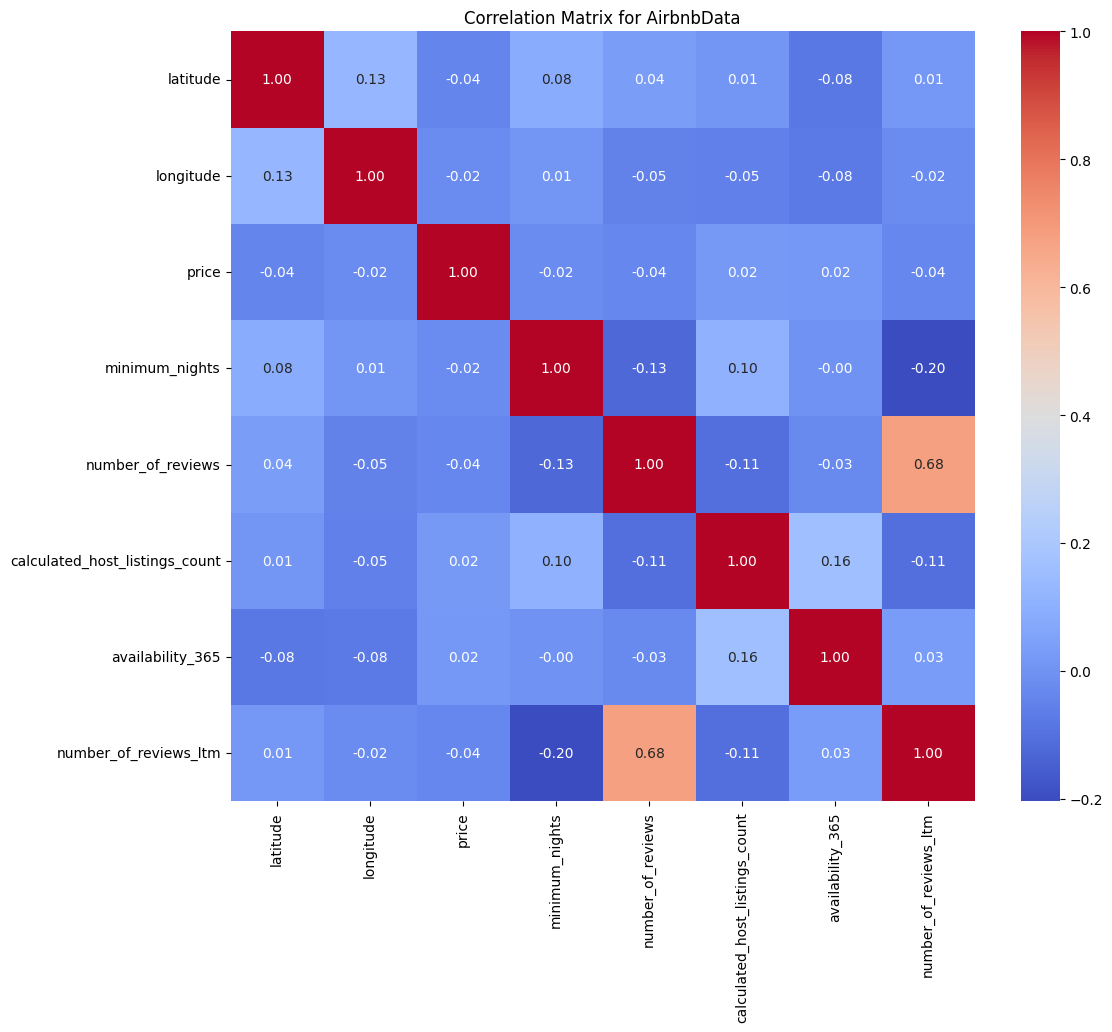

In [16]:
# For AirbnbData, focusing on numeric columns
numeric_cols_df = AirbnbData.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix_airbnb = numeric_cols_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_airbnb, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for AirbnbData')
plt.show()

# DIDNT DO ANY GOOD TO REMOVE OUTLIERS

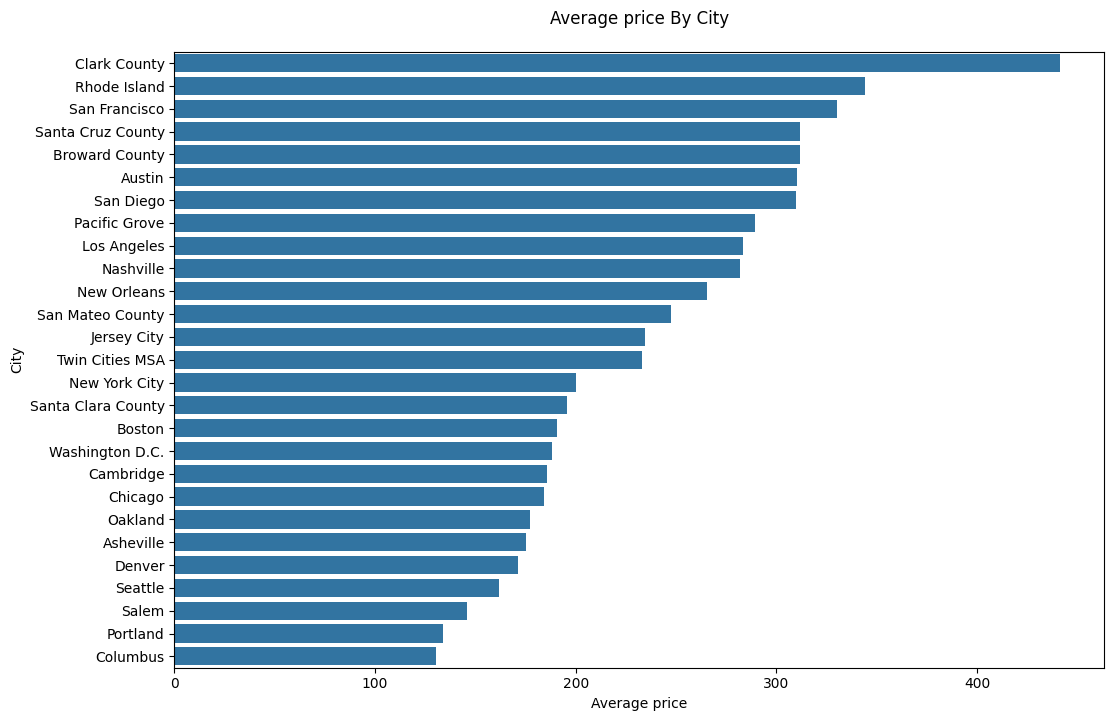

In [76]:
average_price_by_city = AirbnbData.groupby('city')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_price_by_city.values, y=average_price_by_city.index)
plt.title('Average price By City', pad=20)
plt.xlabel('Average price')
plt.ylabel('City')

plt.show()

In [77]:
# ignore warnings that are irrelevant to functionality
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Get unique cities
cities = AirbnbData['city'].unique()

# Determine the maximum number of neighbourhoods in any city to adjust figure height
max_neighbourhoods = max(AirbnbData.groupby('city')['neighbourhood'].nunique())

# Loop through each city to create and save a plot
for city in cities:
    # Filter the data for the current city
    city_data = AirbnbData[AirbnbData['city'] == city]
    
    # Calculate the average price by neighbourhood
    average_price_by_neighbourhood = city_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
    
    # Adjust the figure height based on the number of neighbourhoods, aiming for consistent bar size
    plt.figure(figsize=(10, max(6, 0.5 * len(average_price_by_neighbourhood))))
    
    sns.barplot(x=average_price_by_neighbourhood.values, y=average_price_by_neighbourhood.index)
    plt.title(f'Average Price by Neighbourhood in {city}', pad=20)
    plt.xlabel('Average Price')
    plt.ylabel('Neighbourhood')
    plt.tick_params(axis='y', labelsize=10)
    
    # Save the figure
    plt.tight_layout()
    plt.savefig(f'PriceGraphs/Average_Price_{city}.png')
    
    # Close the figure after saving
    plt.close()

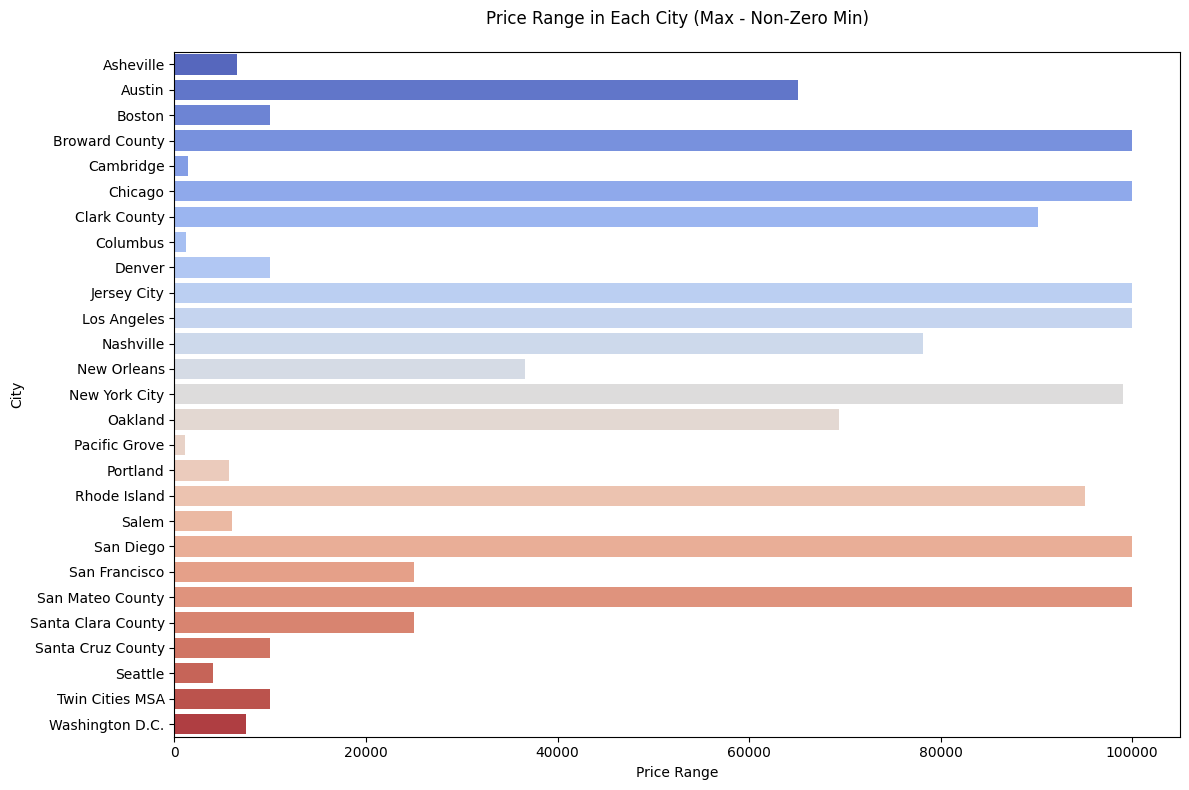

In [71]:
# ignore future warnings that are irrelevant to functionality
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

non_zero_prices = AirbnbData[AirbnbData['price'] > 0]

price_stats_by_city = non_zero_prices.groupby('city')['price'].agg(nonzero_min='min', max='max')


price_stats_by_city['price_range'] = price_stats_by_city['max'] - price_stats_by_city['nonzero_min']


price_stats_by_city_reset = price_stats_by_city.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=price_stats_by_city_reset, x='price_range', y='city', palette='coolwarm', orient='h')
plt.title('Price Range in Each City (Max - Non-Zero Min)', pad=20)
plt.xlabel('Price Range')
plt.ylabel('City')
plt.tight_layout()

plt.show()

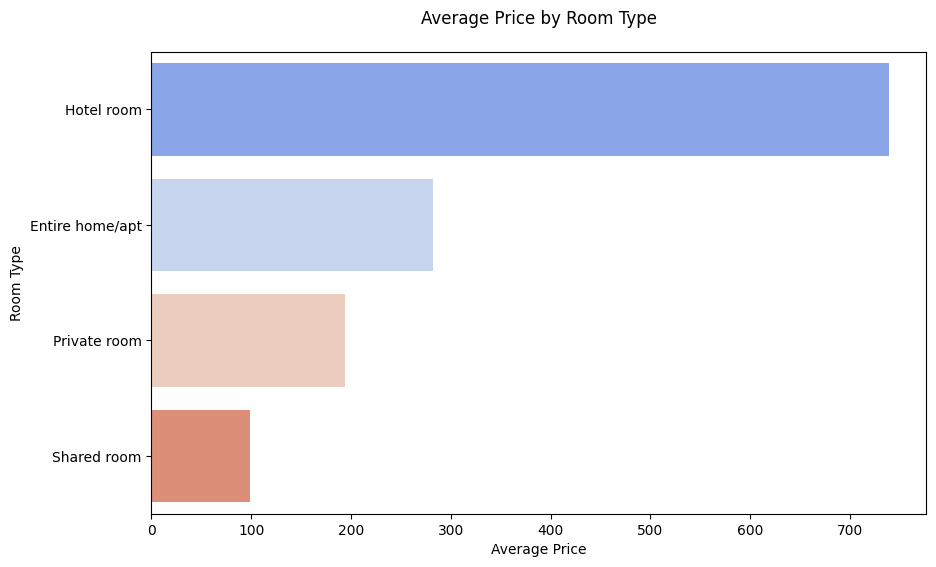

In [70]:
# ignore future warnings that are irrelevant to functionality
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



average_price_by_room_type = AirbnbData.groupby('room_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_room_type.values, y=average_price_by_room_type.index, palette='coolwarm')
plt.title('Average Price by Room Type', pad=20)
plt.xlabel('Average Price')
plt.ylabel('Room Type')
plt.show()

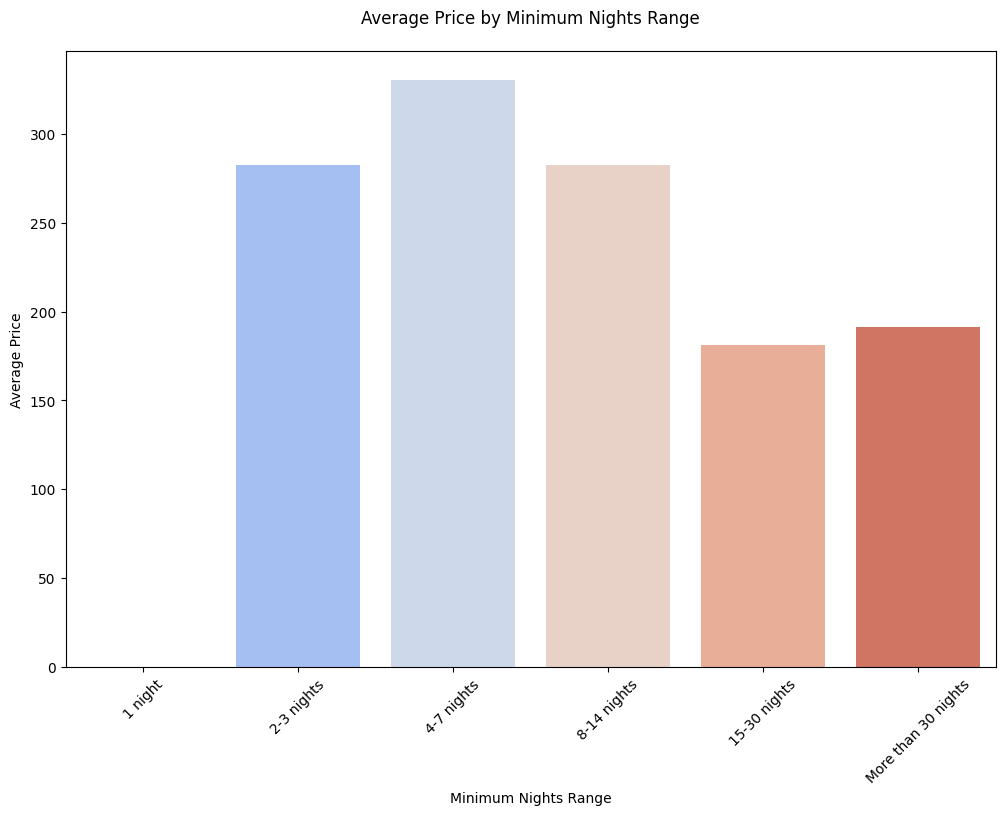

In [69]:
# ignore future warnings that are irrelevant to functionality
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Define bins and labels for the minimum_nights ranges
bins = [0, 1, 3, 7, 14, 30, AirbnbData['minimum_nights'].max()]
labels = ['1 night', '2-3 nights', '4-7 nights', '8-14 nights', '15-30 nights', 'More than 30 nights']

# Categorize minimum_nights into the defined ranges
AirbnbData['minimum_nights_range'] = pd.cut(AirbnbData['minimum_nights'], bins=bins, labels=labels, right=False)


avg_price_by_nights_range = AirbnbData.groupby('minimum_nights_range')['price'].mean()


plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_nights_range.index, y=avg_price_by_nights_range.values, palette='coolwarm')
plt.title('Average Price by Minimum Nights Range', pad=20)
plt.xlabel('Minimum Nights Range')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# TRAINING THE MODEL (Initial Trial)

Set up feature matrix and target variable

In [22]:
X = AirbnbData_encoded.drop('price', axis=1)  # Feature matrix
y = AirbnbData_encoded['price']  # Target variable

Split the data

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instantiating the linear regression model & fitting it to the dataset.

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
predictions = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.5949194622452076e+18
R-squared: -2304615163441.9546


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [28]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

predictions_log = model.predict(X_test_scaled)

In [29]:
mse = mean_squared_error(y_test_log, predictions_log)
r2 = r2_score(y_test_log, predictions_log)

print(f"Mean Squared Error (log scale): {mse}")
print(f"R-squared (log scale): {r2}")

Mean Squared Error (log scale): 4.1118558053373187e+21
R-squared (log scale): -6.105342601646469e+21


# Training the Model (Second Trial)

Data Cleaning and Preproccessing

In [30]:
# Reload the data
airbnb_data = pd.read_csv('AB_US_2023.csv')

# We drop the columns that are non-numerical and are unlikely to influence the prices of the listings.
columns_to_drop = ['id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood_group','neighbourhood']
airbnb_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# These are columns that needs to be one-hot encoded.
nonNumericalCategories = ['room_type', 'city']

# These are numerical columns that we don't want to one-hot encode
numericalCategories = airbnb_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the price which is the target variable
numericalCategories.remove('price') 

C:\Users\musta\AppData\Local\Temp\ipykernel_14388\4122044640.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv('AB_US_2023.csv')


In [31]:
# Handle missing values for numerical features with the median and for categorical with the most frequent value
changeNullNumericalData = SimpleImputer(strategy='median')
airbnb_data[numericalCategories] = changeNullNumericalData.fit_transform(airbnb_data[numericalCategories])

changeNullData = SimpleImputer(strategy='most_frequent')
airbnb_data[nonNumericalCategories] = changeNullData.fit_transform(airbnb_data[nonNumericalCategories])

# One-hot encode the categorical features
airbnb_data = pd.get_dummies(airbnb_data, columns=nonNumericalCategories, drop_first=True)

In [32]:
# Remove the outliers of the dataset.
Q1 = airbnb_data['price'].quantile(0.25) #This part was only used for testing.
Q3 = airbnb_data['price'].quantile(0.50)  
Outlier = Q3 - Q1
upper_bound = Q3 + 3 * Outlier
filtered_data = airbnb_data[(airbnb_data['price'] >= Q1 - 1.5 * Outlier) & (airbnb_data['price'] <= upper_bound)]
airbnb_data_filtered = airbnb_data[(airbnb_data['price'] <= upper_bound)]

In [33]:
# Filter the airbnb data by removing the price in the set.
X_filtered = airbnb_data_filtered.drop('price', axis=1)
y_filtered = airbnb_data_filtered['price']

# Then we split the data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Now train the linear regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

model = LinearRegression()
model.fit(X_train_scaled, y_train_filtered)

LinearRegression()

In [34]:
# Calculate the Mean Squared Error and the R-squared
y_pred_filtered = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_filtered, y_pred_filtered)
r2 = r2_score(y_test_filtered, y_pred_filtered)


print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: { r2}")

Linear Regression - Mean Squared Error: 3730.895141893846
Linear Regression - R-squared: 0.2798401394212706


Much more acceptable values!

# Training the Model with 3 Different Algorithms

In [35]:
datas = pd.read_csv('AB_US_2023.csv')
data1 = datas
datas

C:\Users\musta\AppData\Local\Temp\ipykernel_14388\376578417.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  datas = pd.read_csv('AB_US_2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.765550,-122.452130,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.760300,-122.421970,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232142,849230448624862502,Private Half Moon Bay Oasis By Pillar Point Be...,29395385,Khalid,NaN,Unincorporated Areas,37.506164,-122.476188,Entire home/apt,389,2,0,NaN,NaN,1,365,0,San Mateo County
232143,850805127216414630,Home near SFO,440957696,Christina,NaN,San Bruno,37.623630,-122.426570,Entire home/apt,158,1,0,NaN,NaN,1,364,0,San Mateo County
232144,851562104616413652,Modern New Private Studio in SFO,41574587,Vality,NaN,South San Francisco,37.655661,-122.413130,Entire home/apt,97,1,0,NaN,NaN,32,359,0,San Mateo County
232145,851792795339759410,Lux Bedroom with a Shared Bath near SFO,73133543,Stephannie,NaN,South San Francisco,37.644792,-122.454213,Private room,62,2,0,NaN,NaN,3,67,0,San Mateo County


In [36]:
datas.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [37]:
datas.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.321470e+05,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062.000000,232147.000000,232147.000000,232147.000000
mean,2.584580e+17,1.582248e+08,36.610585,-98.301436,259.468001,13.495867,40.915230,1.638348,29.879055,180.985686,11.689701
std,3.465985e+17,1.587164e+08,5.126523,19.706929,1024.645918,27.920631,80.649152,1.910812,106.013665,134.715299,20.599954
min,6.000000e+00,2.300000e+01,25.957323,-123.089130,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.638896e+07,2.299242e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,0.310000,1.000000,52.000000,0.000000
50%,4.896307e+07,1.005783e+08,36.190556,-97.727670,149.000000,3.000000,9.000000,1.000000,2.000000,175.000000,3.000000
75%,6.633014e+17,2.686930e+08,40.717440,-77.026222,250.000000,30.000000,43.000000,2.420000,10.000000,321.000000,16.000000
max,8.581014e+17,5.069384e+08,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,101.420000,1003.000000,365.000000,1314.000000


In [38]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [39]:
datas["neighbourhood"].value_counts()

neighbourhood
Unincorporated Areas    11882
Hollywood                6005
Fort Lauderdale          4314
Bedford-Stuyvesant       3086
San Jose                 2880
                        ...  
Bartlett                    1
Iveywood                    1
Ward 6                      1
Tijuana River Valley        1
Neponsit                    1
Name: count, Length: 1412, dtype: int64

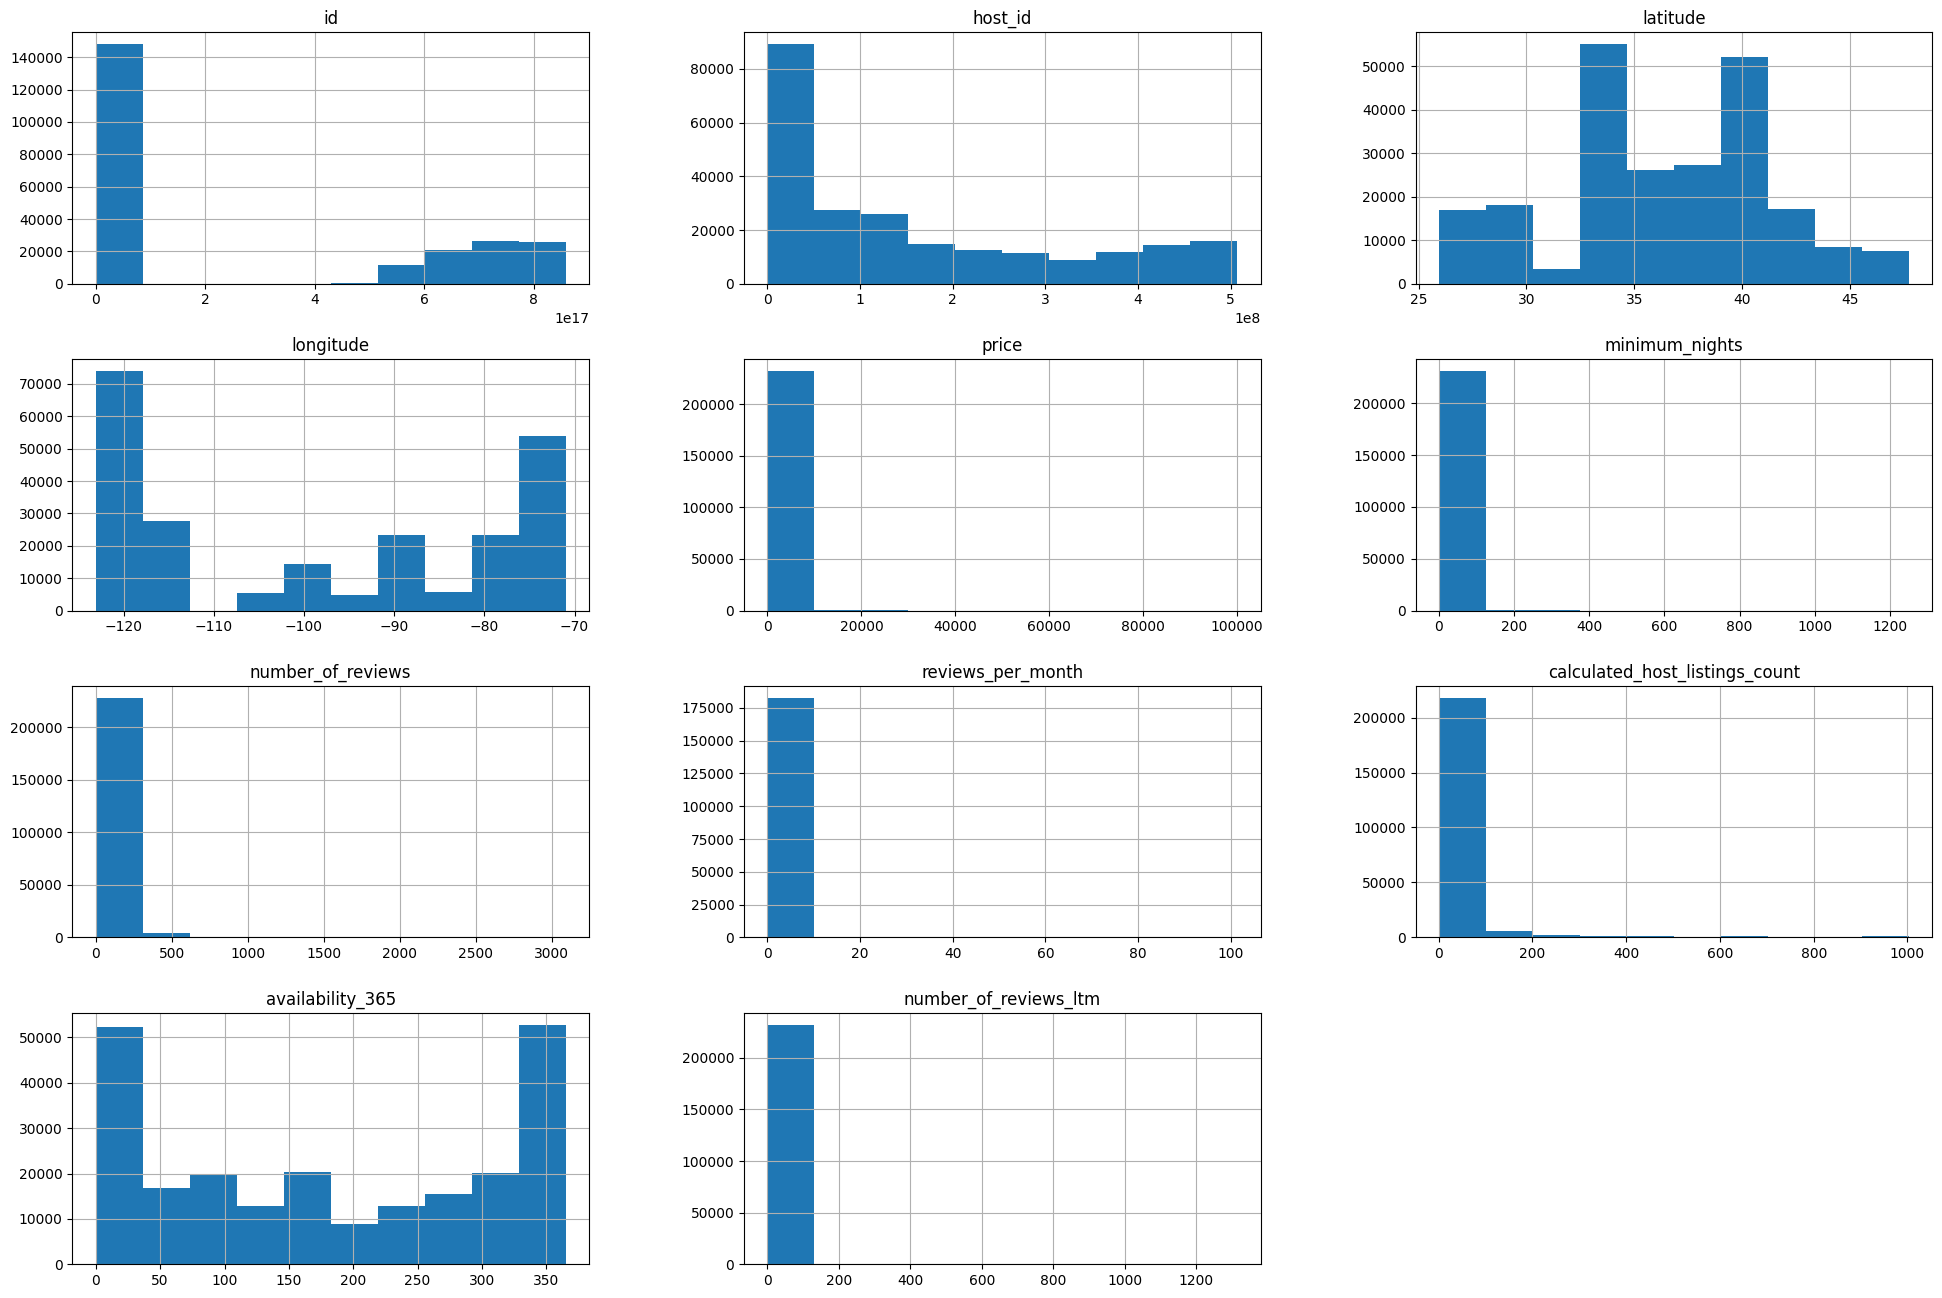

In [40]:
datas.hist(figsize=(24,16))
plt.show()

In [41]:
datas.duplicated().sum()
datas.isna().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

In [42]:
datas["city"].value_counts()

city
New York City         42931
Los Angeles           42451
Broward County        16899
Austin                14368
Clark County          13933
San Diego             12871
Nashville              8548
Chicago                7747
New Orleans            7056
San Francisco          6936
Santa Clara County     6528
Washington D.C.        6455
Seattle                6376
Denver                 5362
Twin Cities MSA        4765
Rhode Island           4742
Portland               4587
Boston                 3864
San Mateo County       3237
Asheville              3161
Oakland                2499
Columbus               2344
Santa Cruz County      1639
Jersey City            1314
Cambridge              1026
Salem                   288
Pacific Grove           220
Name: count, dtype: int64

In [43]:
data1 = datas.drop(labels=["neighbourhood_group", "last_review", "reviews_per_month", "id", "host_id", "name", "host_name", "calculated_host_listings_count", "neighbourhood"], axis = 1)

data1

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,number_of_reviews_ltm,city
0,37.770280,-122.433170,Entire home/apt,202,2,383,128,59,San Francisco
1,37.744740,-122.420890,Entire home/apt,235,30,111,365,0,San Francisco
2,37.765550,-122.452130,Private room,56,32,9,365,1,San Francisco
3,37.775640,-122.436420,Entire home/apt,575,9,28,365,0,San Francisco
4,37.760300,-122.421970,Private room,110,1,770,159,34,San Francisco
...,...,...,...,...,...,...,...,...,...
232142,37.506164,-122.476188,Entire home/apt,389,2,0,365,0,San Mateo County
232143,37.623630,-122.426570,Entire home/apt,158,1,0,364,0,San Mateo County
232144,37.655661,-122.413130,Entire home/apt,97,1,0,359,0,San Mateo County
232145,37.644792,-122.454213,Private room,62,2,0,67,0,San Mateo County


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

datas["room_type"].value_counts()

num_cols = data1.select_dtypes(include='number').columns.tolist()
num_cols.remove("price")
num_cols.remove("latitude")
num_cols.remove("longitude")
cat_cols = data1.select_dtypes(exclude='number').columns.tolist()

cat_pipeline = make_pipeline(OneHotEncoder())
num_pipeline = make_pipeline(StandardScaler())
preprocessing = ColumnTransformer([('cat', cat_pipeline, cat_cols), ('num', num_pipeline, num_cols)], remainder='passthrough')


data2 = preprocessing.fit_transform(data1)

names = preprocessing.get_feature_names_out()
data2 = data2.toarray()
data2 = pd.DataFrame(data=data2, columns=names)

Q1 = data2["remainder__price"].quantile(0.25)
Q3 = data2["remainder__price"].quantile(0.50)
IQR = Q3 - Q1
outliers = data2[ (data2["remainder__price"] > Q3 + 1.5 * IQR)]
data2 = data2.drop(outliers.index)

data2

,cat__room_type_Entire home/apt,cat__room_type_Hotel room,cat__room_type_Private room,cat__room_type_Shared room,cat__city_Asheville,cat__city_Austin,cat__city_Boston,cat__city_Broward County,cat__city_Cambridge,cat__city_Chicago,...,cat__city_Seattle,cat__city_Twin Cities MSA,cat__city_Washington D.C.,num__minimum_nights,num__number_of_reviews,num__availability_365,num__number_of_reviews_ltm,remainder__latitude,remainder__longitude,remainder__price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.411735,4.241650,-0.393317,2.296626,37.770280,-122.433170,202.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.591110,0.869010,1.365953,-0.567464,37.744740,-122.420890,235.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.662742,-0.395730,1.365953,-0.518920,37.765550,-122.452130,56.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.447551,9.040223,-0.163201,1.083029,37.760300,-122.421970,110.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.447551,-0.271736,1.365953,-0.518920,37.717500,-122.396980,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.447551,-0.507325,1.328837,-0.567464,37.640760,-122.418061,221.0
232143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.447551,-0.507325,1.358530,-0.567464,37.623630,-122.426570,158.0
232144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.447551,-0.507325,1.321414,-0.567464,37.655661,-122.413130,97.0
232145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.411735,-0.507325,-0.846125,-0.567464,37.644792,-122.454213,62.0


In [45]:
data2.describe()

,cat__room_type_Entire home/apt,cat__room_type_Hotel room,cat__room_type_Private room,cat__room_type_Shared room,cat__city_Asheville,cat__city_Austin,cat__city_Boston,cat__city_Broward County,cat__city_Cambridge,cat__city_Chicago,...,cat__city_Seattle,cat__city_Twin Cities MSA,cat__city_Washington D.C.,num__minimum_nights,num__number_of_reviews,num__availability_365,num__number_of_reviews_ltm,remainder__latitude,remainder__longitude,remainder__price
count,169080.00000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,...,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000,169080.000000
mean,0.66423,0.002792,0.320138,0.012840,0.015070,0.053809,0.017708,0.058582,0.004714,0.038029,...,0.032363,0.022049,0.029767,0.057590,0.057271,-0.046530,0.040184,37.082735,-98.244256,120.358333
std,0.47226,0.052762,0.466531,0.112585,0.121831,0.225641,0.131887,0.234841,0.068495,0.191268,...,0.176964,0.146842,0.169944,1.046934,1.088474,1.006465,1.066764,5.051998,19.921036,53.367290
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.447551,-0.507325,-1.343471,-0.567464,25.957323,-123.089130,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.411735,-0.494925,-1.031702,-0.567464,34.035027,-118.327123,78.000000
50%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.375919,-0.383331,-0.118663,-0.421832,37.390524,-97.721745,115.000000
75%,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.591110,0.087847,1.009645,0.257783,40.728745,-76.980840,160.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,44.286491,37.819261,1.365953,63.219223,47.734010,-70.996000,236.000000


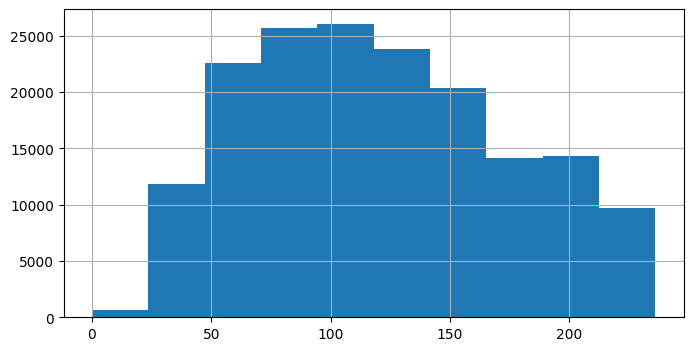

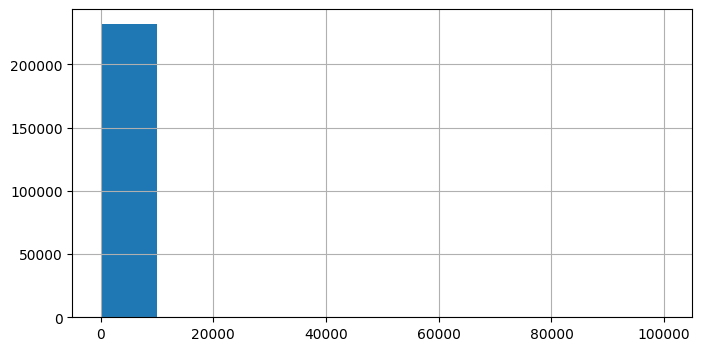

In [46]:
data2["remainder__price"].hist(figsize=(8,4))
plt.show()
datas["price"].hist(figsize=(8,4))
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X = data2.drop(["remainder__price"], axis = 1)
y = data2["remainder__price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(135264, 37) (135264,) (33816, 37) (33816,)


In [48]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)


LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

lr_y_predict = lr_model.predict(X_test)

# Calculate MSE
lr_mse = mean_squared_error(y_test, lr_y_predict)

# Calculate R-squared
lr_r2 = r2_score(y_test, lr_y_predict)

# Now you have both MSE and R-squared for the Linear Regression model predictions
print(f"Linear Regression - MSE: {lr_mse}")
print(f"Linear Regression - R-squared: {lr_r2}")


Linear Regression - MSE: 1961.8419998810753
Linear Regression - R-squared: 0.3151468029491711


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)
LassoModel = Lasso(alpha=1)
lasso_model = LassoModel.fit(X_train, y_train)

Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
# Calculate MSE for Ridge Regression
ridge_mse = mean_squared_error(y_test, Ridge_y_predict)
# Calculate R-squared for Ridge Regression
ridge_r2 = r2_score(y_test, Ridge_y_predict)

# Calculate MSE for Lasso Regression
lasso_mse = mean_squared_error(y_test, Lasso_y_predict)
# Calculate R-squared for Lasso Regression
lasso_r2 = r2_score(y_test, Lasso_y_predict)

# Print the MSE and R-squared for both models
print(f"Ridge Regression - MSE: {ridge_mse}")
print(f"Ridge Regression - R-squared: {ridge_r2}")
print(f"Lasso Regression - MSE: {lasso_mse}")
print(f"Lasso Regression - R-squared: {lasso_r2}")


Ridge Regression - MSE: 1971.5678154961488
Ridge Regression - R-squared: 0.31175164884485806
Lasso Regression - MSE: 2051.837108173391
Lasso Regression - R-squared: 0.28373069623075853


In [51]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-1924.56947846, -1937.96817668, -1934.61936189, -1966.47324656,
       -1985.11921044])

In [52]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')

Cross-Validation Mean Score: 1949.749894806841


# Machine Learning Algorithms Performance Comparison Table

In [53]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

# Split the dataset into %20 test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of machine learning models for evaluation
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

# Initialize the results list
results = []

# Evaluate each model
for name, model in models:
    # Create a pipeline with standardization and the model
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Compute cross-validation scores
    mse_scores = cross_val_score(pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    r2_scores = cross_val_score(pipeline, X_train, y_train, scoring="r2", cv=5)
    
    # Store the results
    results.append({
        "Model": name,
        "Cross-Validation MSE": -np.mean(mse_scores),
        "Cross-Validation R-squared": np.mean(r2_scores)
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Model,Cross-Validation MSE,Cross-Validation R-squared
0,Linear Regression,1949.806944,0.314385
1,Ridge Regression,1951.880763,0.313657
2,Lasso Regression,1989.420494,0.300457


In [62]:
import dataframe_image as dfi

# Save the DataFrame as an image
dfi.export(results_df, 'results_df.png')
results_df



,Model,Cross-Validation MSE,Cross-Validation R-squared
0,Linear Regression,1949.806944,0.314385
1,Ridge Regression,1951.880763,0.313657
2,Lasso Regression,1989.420494,0.300457


# 3 Graphs for the best performing algorithm

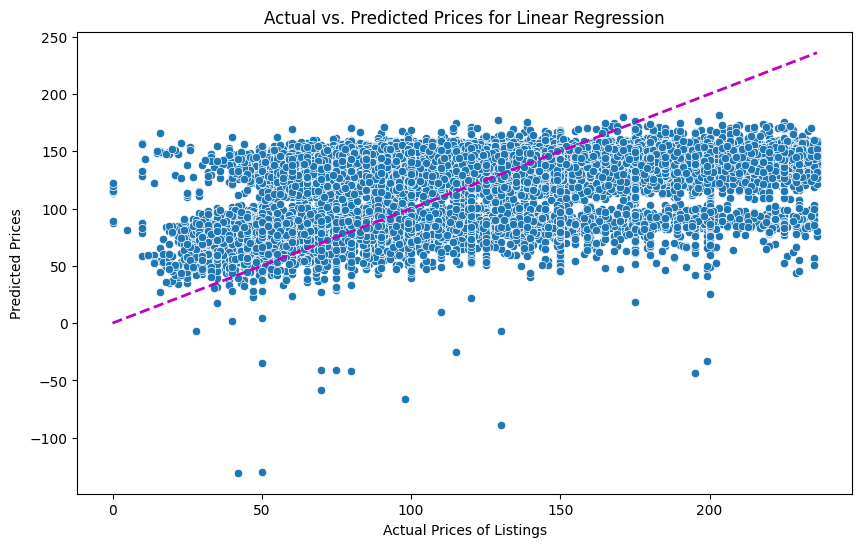

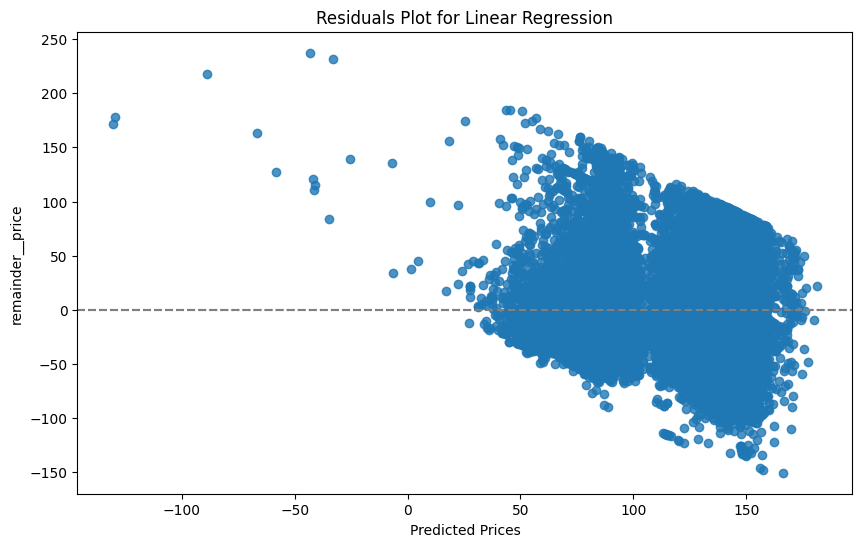

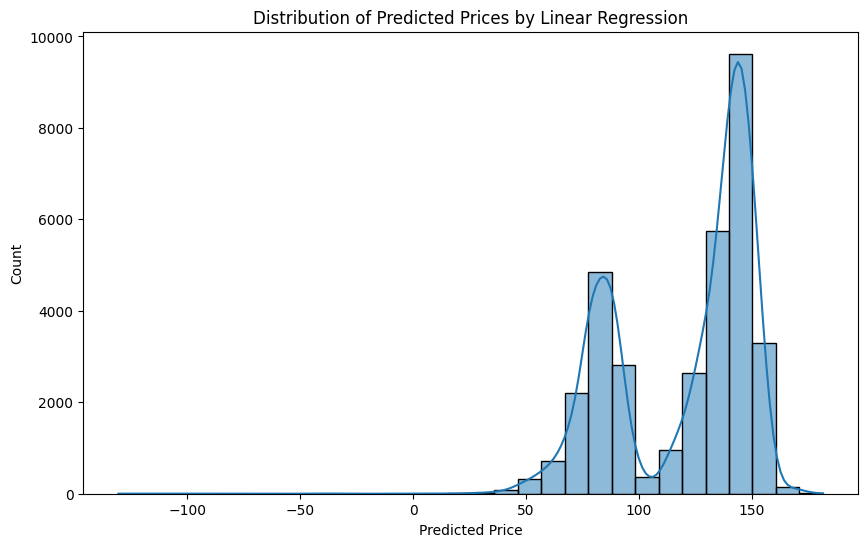

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prediction vs. Actual Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lr_y_predict)
plt.xlabel('Actual Prices of Listings')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices for Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=2)

plt.show()

# Residuals Plot for Linear Regression
residuals = y_test - lr_y_predict
plt.figure(figsize=(10, 6))
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Linear Regression')
sns.residplot(x=lr_y_predict, y=residuals, lowess=False, line_kws={'color': 'red', 'lw': 1})
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogram of Predicted Prices from Linear Regression
plt.figure(figsize=(10, 6))
plt.title('Distribution of Predicted Prices by Linear Regression')
plt.xlabel('Predicted Price')
plt.ylabel('Count')
sns.histplot(lr_y_predict, bins=30, kde=True)
plt.show()
